## Preparation

In [1]:
import pysd
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import math


In [4]:
    mpl.rc('lines', linewidth=1.5, markersize=4)
    mpl.rc('grid', linewidth=0.5, linestyle='--')
    mpl.rc('font', size=7, family='Times New Roman')
    mpl.rc('text',usetex=False)
    cm = 1/2.54
    mpl.rc('figure', figsize=(20*cm, 10*cm))


### Determine Directory

In [5]:
vensimDirectory='./Simulation Files/Prosumers & defectors'
vensimFile ='net metering-no fixed tariff.mdl'
filepath = Path(vensimDirectory,vensimFile)
model = pysd.read_vensim(str(filepath))

In [5]:
outputVariableList = ['effect of remaining time on change in electricity tariff','tariff correction remaining time']

In [26]:
important_vars=['Electricity Tariff','Budget Deficit', 'Utility Energy Sale','Total Costs','NPV PV'
,'Total Consumers','PV Customers Ratio','Defectors','Regular Consumers','Prosumers'
,'New Regular Consumers','New Prosumers','New Defectors'
,'New Regular Consumer Ratio','New Prosumer Ratio','New Defector Ratio'
,'Regular Consumer Average Demand', 'Prosumer Average Demand']
# important_vars=['Electricity Tariff','Budget Deficit', 'Utility Energy Sale','Total Costs']

In [27]:
timestep=2**-10
paramaters = {
    'population growth rate': 1.4**(1/240)-1,
    'time to adjust Prosumer Demand': 1,
    'time to adjust Regular Consumer demand': 1,
    'TIME STEP': timestep,
    'SAVEPER': timestep,
    'Tariff Correction Period': 3,
    'price elasticity of prosumers': -0.2,
    'price elasticity of regular consumers': -0.1,
    'Initial Electricity Tariff': 0.15,
    'PV Potential': 0.3,
    'FINAL TIME': 600
}

result = model.run(params=paramaters, return_columns=important_vars )

In [28]:
result.head()

,Electricity Tariff,Budget Deficit,Utility Energy Sale,Total Costs,NPV PV,Total Consumers,PV Customers Ratio,Defectors,Regular Consumers,Prosumers,New Regular Consumers,New Prosumers,New Defectors,New Regular Consumer Ratio,New Prosumer Ratio,New Defector Ratio,Regular Consumer Average Demand,Prosumer Average Demand
0.000000,0.15,0.000000,2.000000e+09,2.720000e+08,8598.619829,4.000000e+06,0.00000,0.000000,4.000000e+06,0.000000,4022.235016,1028.388111,420.942271,0.716746,0.183254,0.1,500.0,200.0
0.000977,0.15,12500.000000,1.999998e+09,2.719999e+08,8598.815793,4.000005e+06,0.00001,3.666285,3.999993e+06,8.460929,4022.182943,1028.447104,420.942852,0.716735,0.183265,0.1,500.0,200.0
0.001953,0.15,25000.123000,1.999997e+09,2.719998e+08,8599.011807,4.000011e+06,0.00002,7.332581,3.999986e+06,16.922766,4022.130863,1028.506103,420.943434,0.716725,0.183275,0.1,500.0,200.0
0.002930,0.15,37500.368493,1.999995e+09,2.719997e+08,8599.207871,4.000016e+06,0.00003,10.998890,3.999980e+06,25.385511,4022.078777,1028.565110,420.944015,0.716715,0.183285,0.1,500.0,200.0
0.003906,0.15,50000.735972,1.999993e+09,2.719996e+08,8599.403984,4.000022e+06,0.00004,14.665210,3.999973e+06,33.849163,4022.026683,1028.624123,420.944597,0.716704,0.183296,0.1,500.0,200.0


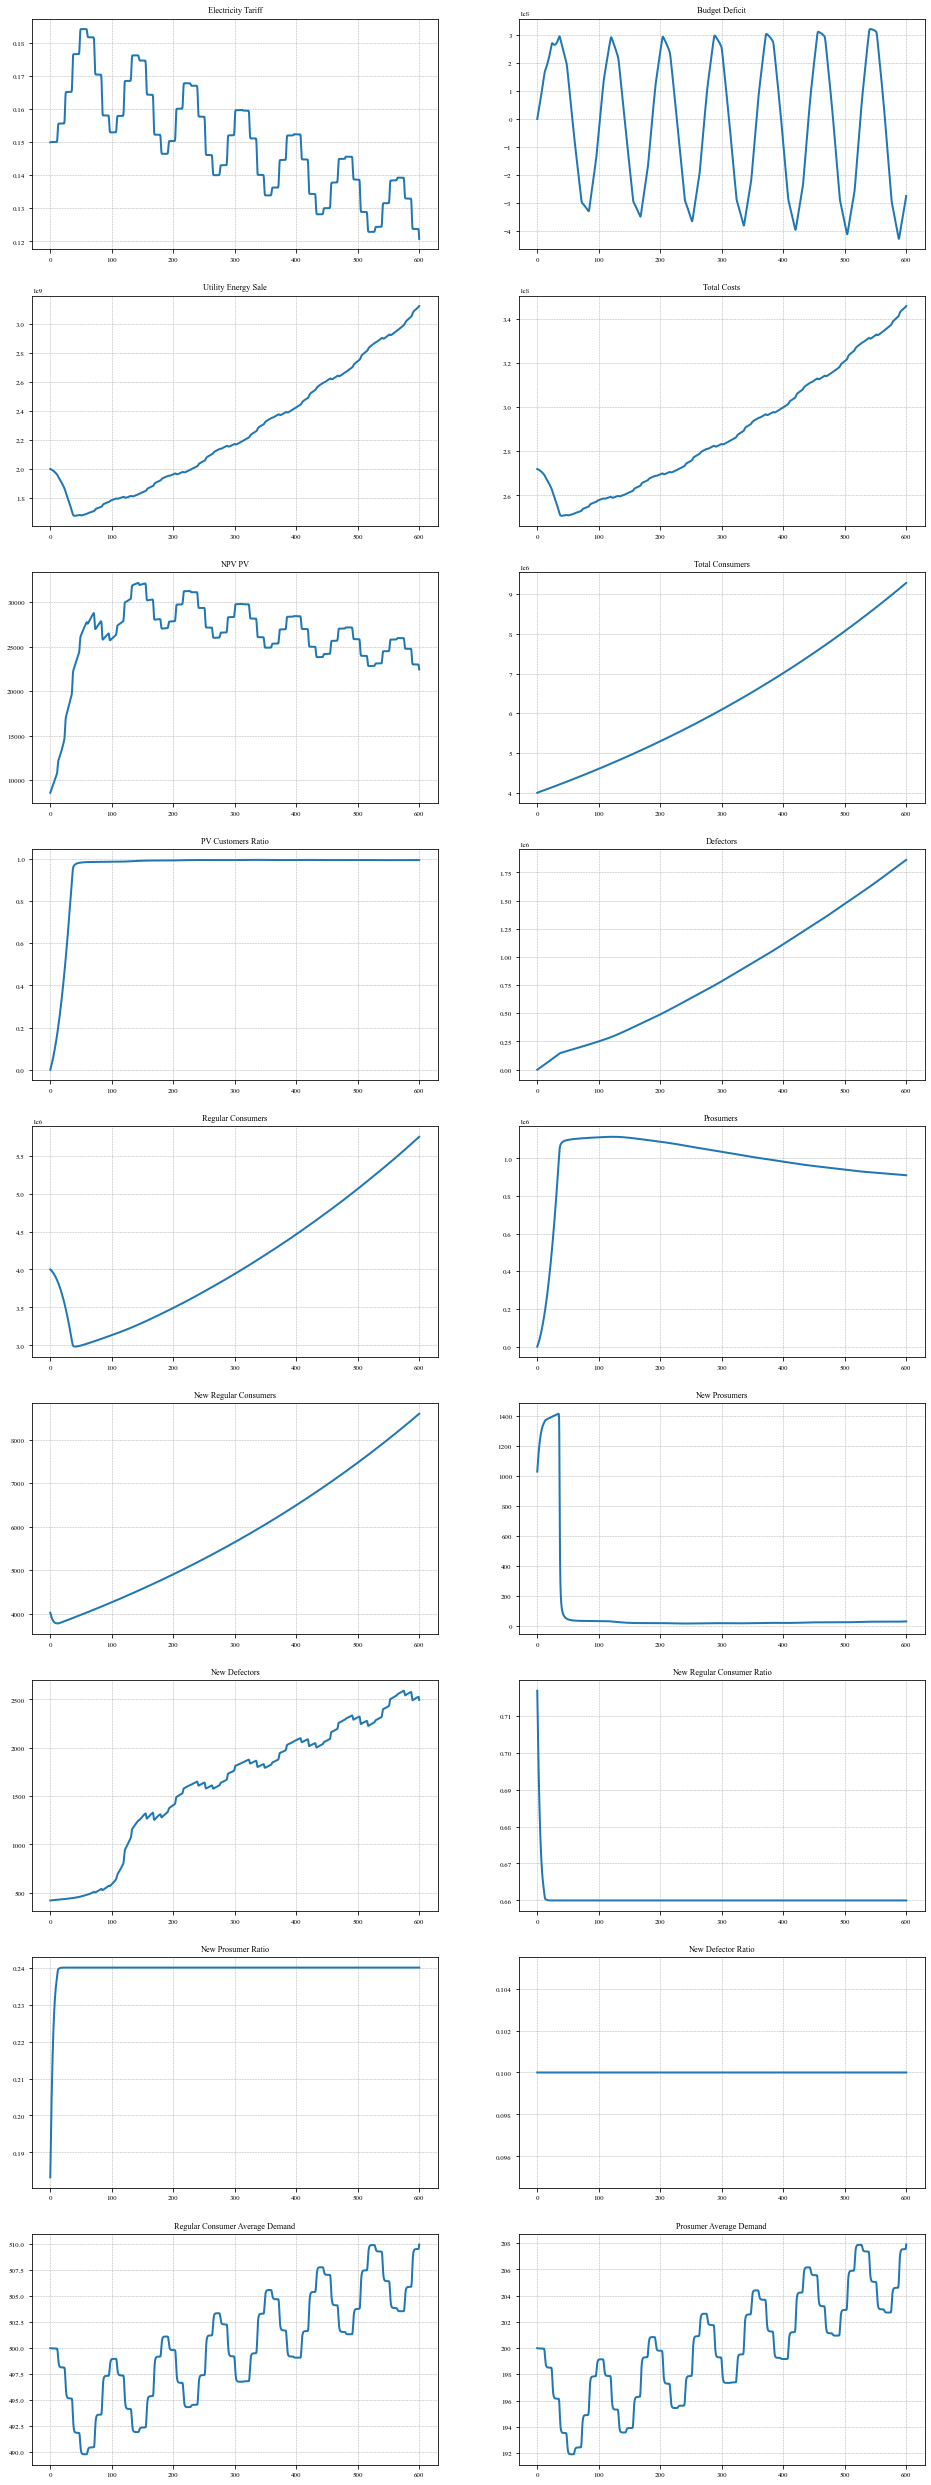

In [29]:
mpl.rc('lines',linewidth=2)  
n_rows= math.ceil(len(important_vars)/2)
fig,ax =plt.subplots(n_rows,2)
# n_rows= len(important_vars)
# fig,ax =plt.subplots(n_rows)
fig.set_size_inches(16,n_rows*5)
for i,v in enumerate(important_vars):
    # cur_ax=ax[i]
    cur_ax=ax[i//2,i%2]
    result[v].plot(ax=cur_ax)
    cur_ax.grid(True,linestyle='--')
    cur_ax.title.set_text(v)

In [30]:
lost_sale =result.loc[0,'Utility Energy Sale']-result['Utility Energy Sale']

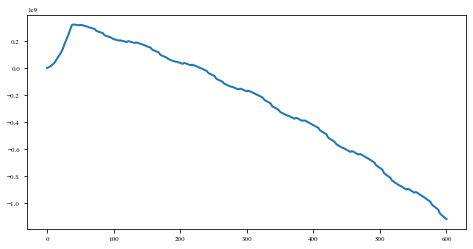

In [31]:
plt.plot(lost_sale)

In [32]:
shadow=(result['Electricity Tariff'].max()-result.loc[0,'Electricity Tariff'])*lost_sale/lost_sale.max()+result.loc[0,'Electricity Tariff']


In [35]:
result.to_csv(r'./Outputs/period_600.csv')

IndexError: index 2 is out of bounds for axis 0 with size 2

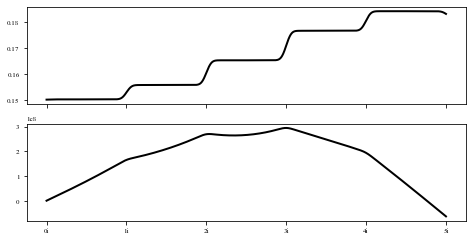

In [36]:
fig,ax=plt.subplots(2,1,sharex=True)
for i,c in enumerate(result.columns):
    ax[i].plot(result.loc[:60,c],c='k')
    ax[i].set_xticks([x for x in range(0,61,12)])
    ax[i].set_xticklabels([f'{x}i' for x in range(6)])

ax[0].set_title(r'$ \xi(t,i) $')
ax[1].set_title(r'$ \rho(t,i) $')
fig.tight_layout(h_pad=1)
# plt.savefig('chart.pdf',bbox_inches='tight')

In [ ]:
constants = variables.loc[variables["Type"]=='constant',['Real Name', 'Eqn','Unit']]
constants.loc[:,'Eqn']=constants.loc[:,'Eqn'].apply(lambda x: str(x)[2:-1])
constants.loc[:,'Unit']=constants.loc[:,'Unit'].apply(lambda x: str(x)[2:-1])
constants.columns=['Parameter','Value','Unit']
print(constants)

NameError: name 'variables' is not defined